In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
from sklearn.decomposition import PCA
import config
from config import CONNSTRING
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
engine= create_engine(CONNSTRING)

query = "SELECT * FROM customer_data"
df = pd.read_sql(query, engine)

In [4]:
#Clustering Customers
#Step 1: Data Preprocessing
# Converting columns to appropriate data types
df['Customer ID'] = df['Customer ID'].astype(int)  # Assuming 'Customer ID' is an integer
df['age'] = df['age'].astype(int)  # Age is an integer
df['gender'] = df['gender'].astype('category')  # Gender as category
df['Item Purchased'] = df['Item Purchased'].astype('category')  # Item Purchased as category
df['category'] = df['category'].astype('category')  # Category as category
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)  # Purchase Amount as float
df['location'] = df['location'].astype('category')  # Location as category
df['size'] = df['size'].astype('category')  # Size as category
df['color'] = df['color'].astype('category')  # Color as category
df['season'] = df['season'].astype('category')  # Season as category
df['Review Rating'] = df['Review Rating'].astype(float)  # Review Rating as float
df['Subscription Status'] = df['Subscription Status'].astype('category')  # Subscription Status as category
df['Shipping Type'] = df['Shipping Type'].astype('category')  # Shipping Type as category
df['Discount Applied'] = df['Discount Applied'].astype('category')  # Discount Applied as category (assuming 'Yes'/'No')
df['Promo Code Used'] = df['Promo Code Used'].astype('category')  # Promo Code Used as category
df['Previous Purchases'] = df['Previous Purchases'].astype(int)  # Previous Purchases as integer
df['Payment Method'] = df['Payment Method'].astype('category')  # Payment Method as category
df['Frequency of Purchases'] = df['Frequency of Purchases'].astype('category')  # Frequency of Purchases as category

In [13]:
# Select relevant features
features_categorical = df[['gender', 'category', 'location', 'Payment Method']].copy()
features_numerical = df[['age', 'Previous Purchases','Purchase Amount (USD)']].copy()


features_encoded = pd.get_dummies(features_categorical)
features_encoded.head() 

# Concatenate numerical and encoded features
features = pd.concat([features_numerical, features_encoded], axis=1)
features.head()

,age,Previous Purchases,Purchase Amount (USD),gender_Female,gender_Male,category_Accessories,category_Clothing,category_Footwear,category_Outerwear,location_Alabama,...,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,55,14,53.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,19,2,64.0,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,50,23,73.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,21,49,90.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,45,31,49.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

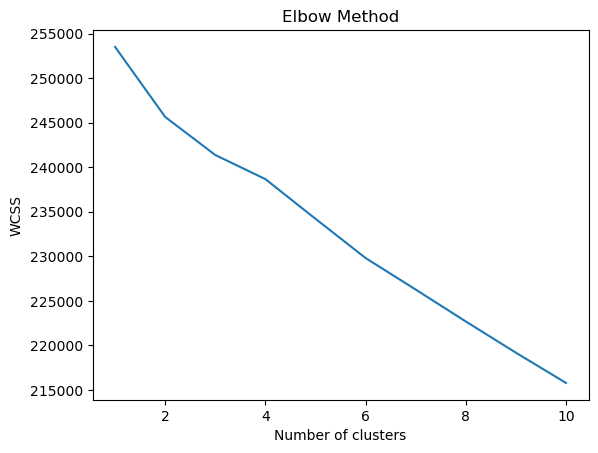

In [15]:
# ... (your previous code)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
# Create a clustering model (example: K-Means)
kmeans = KMeans(n_clusters=3)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(features_scaled)

c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


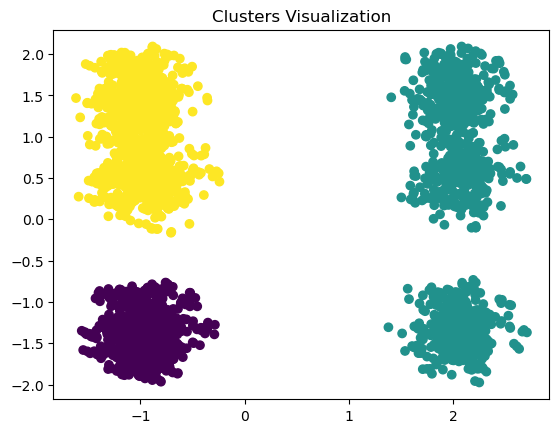

In [26]:
# Add cluster labels to the original DataFrame
df['cluster'] = clusters

# Visualize clusters using PCA (for example)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

# Plot clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualization')
plt.show()

Distinct Clusters: The plot clearly shows four distinct clusters, indicating that your customer base can be divided into four main segments.
Cluster Separation: The clusters are well-separated, suggesting that the segmentation is meaningful and the algorithm has effectively captured underlying patterns in the data.
Cluster Shapes: The shape and density of each cluster can provide additional information about the customer segments. For example, a circular cluster might indicate customers with similar characteristics, while an elongated cluster could suggest a gradient in certain features.

-- To understand the relationship between features and customer segments, you'll need to analyze the original data:

Calculate Cluster Means: Compute the mean value of each feature for each cluster. This will give you a general idea of the characteristics of customers in each segment.
Feature Importance: Use techniques like feature importance from decision trees or random forests to identify the features that contribute most to the clustering.
Domain Knowledge: Leverage your understanding of the business and customer data to interpret the cluster characteristics.

In [19]:
# Calculate cluster means for numerical features
cluster_means = df.groupby(clusters)[['age', 'Previous Purchases', 'Purchase Amount (USD)']].mean()

# Print the cluster means
print(cluster_means)

         age  Previous Purchases  Purchase Amount (USD)
0  44.007212           24.596154              60.249199
1  44.288239           25.943576              59.321550
2  43.859441           25.412362              59.803556


In [22]:
def get_all_modes(series):
    """Returns a list of all modes in a pandas Series."""
    return list(series.mode())

# Calculate all modes for categorical features
cluster_modes = df.groupby(clusters)[['gender', 'category', 'location']].agg(get_all_modes)

print(cluster_modes)

     gender       category                        location
0  [Female]     [Clothing]                       [Montana]
1    [Male]  [Accessories]                    [New Mexico]
2    [Male]     [Clothing]  [Indiana, Louisiana, Missouri]


In [21]:
# Combine numerical means and categorical modes
cluster_summary = pd.concat([cluster_means, cluster_modes], axis=1)
print(cluster_summary)

         age  Previous Purchases  Purchase Amount (USD)  gender     category  \
0  44.007212           24.596154              60.249199  Female     Clothing   
1  44.288239           25.943576              59.321550    Male  Accessories   
2  43.859441           25.412362              59.803556    Male     Clothing   

                                            location  
0                                            Montana  
1                                         New Mexico  
2  ['Indiana', 'Louisiana', 'Missouri']
Categorie...  


In [28]:

numerical_features = ['age', 'Previous Purchases', 'Purchase Amount (USD)'] 
categorical_features=['gender', 'category', 'location', 'Payment Method']
# Calculate descriptive statistics for numerical features
cluster_stats = df.groupby('cluster')[numerical_features].describe()

# Calculate mode for categorical features
cluster_modes = df.groupby('cluster')[categorical_features].agg(lambda x: x.value_counts().index[0])

# Combine descriptive statistics and modes
cluster_profiles = pd.concat([cluster_stats, cluster_modes], axis=1)

print(cluster_profiles)


         (age, count)  (age, mean)  (age, std)  (age, min)  (age, 25%)  \
cluster                                                                  
0              1181.0    43.859441   15.647620        18.0        30.0   
1              1248.0    44.007212   14.953843        18.0        31.0   
2              1471.0    44.288239   15.069584        18.0        31.0   

         (age, 50%)  (age, 75%)  (age, max)  (Previous Purchases, count)  \
cluster                                                                    
0              43.0        58.0        70.0                       1181.0   
1              44.0        57.0        70.0                       1248.0   
2              44.0        57.0        70.0                       1471.0   

         (Previous Purchases, mean)  ...  (Purchase Amount (USD), std)  \
cluster                              ...                                 
0                         25.412362  ...                     23.987398   
1                         